## Importing Dependencies

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

## Perform EDA

In [47]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [49]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [50]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [51]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [52]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [53]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [54]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [55]:
df.groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

## Uniform Distribution 

In [56]:
legit_sam = legit.sample(492)

In [57]:
legit_sam.shape

(492, 31)

In [58]:
legit_sam.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64844,51330.0,-1.487961,1.346616,-0.995273,0.239482,1.898298,3.717779,-0.634568,1.707207,-0.539735,...,-0.000742,-0.172970,-0.046176,1.014963,0.167799,-0.268261,-0.204169,0.013468,1.00,0
46572,42841.0,1.138906,-0.145367,0.522346,0.528486,-0.452280,-0.172054,-0.126709,-0.042251,0.560817,...,-0.040005,0.149759,-0.088715,0.191973,0.488075,0.694070,-0.016303,0.010994,37.28,0
43495,41527.0,1.155024,-0.229358,0.678304,0.289135,-0.560208,0.141780,-0.551156,0.164618,0.307228,...,0.017634,-0.063004,-0.088329,-0.474154,0.212186,0.421672,-0.020095,0.014923,47.89,0
110112,71682.0,-1.487636,0.050536,-0.756909,-0.523839,-3.242918,0.540413,3.622878,-0.229819,-0.158809,...,0.008240,0.177872,0.671108,0.449233,-0.373862,0.845570,0.357197,-0.037029,750.25,0
165079,117183.0,-0.479768,0.820192,-0.511850,0.037340,1.706104,5.230312,-1.677843,-2.060724,0.353052,...,3.235253,-0.394508,-0.186144,0.693571,1.045909,-0.154461,0.428350,0.233744,74.00,0


In [59]:
legit_sam.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64844,51330.0,-1.487961,1.346616,-0.995273,0.239482,1.898298,3.717779,-0.634568,1.707207,-0.539735,...,-0.000742,-0.172970,-0.046176,1.014963,0.167799,-0.268261,-0.204169,0.013468,1.00,0
46572,42841.0,1.138906,-0.145367,0.522346,0.528486,-0.452280,-0.172054,-0.126709,-0.042251,0.560817,...,-0.040005,0.149759,-0.088715,0.191973,0.488075,0.694070,-0.016303,0.010994,37.28,0
43495,41527.0,1.155024,-0.229358,0.678304,0.289135,-0.560208,0.141780,-0.551156,0.164618,0.307228,...,0.017634,-0.063004,-0.088329,-0.474154,0.212186,0.421672,-0.020095,0.014923,47.89,0
110112,71682.0,-1.487636,0.050536,-0.756909,-0.523839,-3.242918,0.540413,3.622878,-0.229819,-0.158809,...,0.008240,0.177872,0.671108,0.449233,-0.373862,0.845570,0.357197,-0.037029,750.25,0
165079,117183.0,-0.479768,0.820192,-0.511850,0.037340,1.706104,5.230312,-1.677843,-2.060724,0.353052,...,3.235253,-0.394508,-0.186144,0.693571,1.045909,-0.154461,0.428350,0.233744,74.00,0


## Data Preprocess

In [60]:
new_df = pd.concat([legit_sam, fraud], axis=0)

In [61]:
new_df.shape

(984, 31)

In [62]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64844,51330.0,-1.487961,1.346616,-0.995273,0.239482,1.898298,3.717779,-0.634568,1.707207,-0.539735,...,-0.000742,-0.172970,-0.046176,1.014963,0.167799,-0.268261,-0.204169,0.013468,1.00,0
46572,42841.0,1.138906,-0.145367,0.522346,0.528486,-0.452280,-0.172054,-0.126709,-0.042251,0.560817,...,-0.040005,0.149759,-0.088715,0.191973,0.488075,0.694070,-0.016303,0.010994,37.28,0
43495,41527.0,1.155024,-0.229358,0.678304,0.289135,-0.560208,0.141780,-0.551156,0.164618,0.307228,...,0.017634,-0.063004,-0.088329,-0.474154,0.212186,0.421672,-0.020095,0.014923,47.89,0
110112,71682.0,-1.487636,0.050536,-0.756909,-0.523839,-3.242918,0.540413,3.622878,-0.229819,-0.158809,...,0.008240,0.177872,0.671108,0.449233,-0.373862,0.845570,0.357197,-0.037029,750.25,0
165079,117183.0,-0.479768,0.820192,-0.511850,0.037340,1.706104,5.230312,-1.677843,-2.060724,0.353052,...,3.235253,-0.394508,-0.186144,0.693571,1.045909,-0.154461,0.428350,0.233744,74.00,0


In [63]:
X = new_df.drop('Class', axis=1)
y = new_df.Class

## Train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=new_df.Class,test_size = 0.2 ,random_state=2025)

In [135]:
X_train.shape

(787, 30)

In [136]:
X_test.shape

(197, 30)

In [137]:
y_train.shape

(787,)

In [138]:
y_test.shape

(197,)

## Model Building

In [182]:
model_log = LogisticRegression()

In [175]:
model = RandomForestClassifier(n_estimators=90)

In [176]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90)

In [177]:
model.score(X_test,y_test)

0.9543147208121827

In [178]:
y_pred = model.predict(X_test)

In [179]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

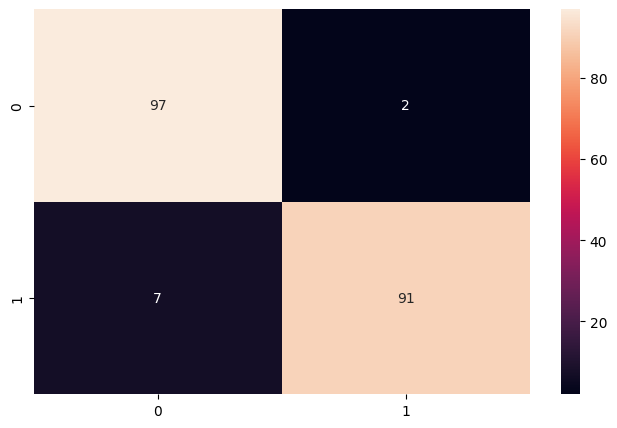

In [180]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True)

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.98      0.93      0.95        98

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197

